### Detecting Emotion in Photos of Faces using Convolutional Neural Network

In [4]:
# import libraries
import pandas as pd
import os
from PIL import Image

from matplotlib import pyplot
import matplotlib.pyplot as plt


In [5]:
images = pd.DataFrame(columns=['img', 'width', 'height', 'values', 'set', 'emotion'])

In [6]:
#import images/data and create a pd dataframe to store

paths = ['test/angry', 'test/disgust', 'test/fear', 'test/happy', 'test/neutral', 'test/sad', 'test/surprise',
         'train/angry', 'train/disgust', 'train/fear', 'train/happy', 'train/neutral', 'train/sad', 'train/surprise',]

#loop through folders
for path in paths:
    folder_path = "Data/" + path
    categories = folder_path.split('/')
    set_type = categories[1]
    emotion_type = categories[2]

    #import all files
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg")):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            width, height = img.size #dimensions of each image
            pixel_values = list(img.getdata()) #flattened pixel values
            images.loc[len(images.index)] = [img, width, height, pixel_values, set_type, emotion_type] #save to dataframe
            img.close()


In [7]:
images

,img,width,height,values,set,emotion
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, 4...",test,angry
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[127, 126, 123, 119, 115, 112, 111, 111, 110, ...",test,angry
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[250, 251, 251, 249, 250, 250, 248, 251, 250, ...",test,angry
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[94, 183, 202, 212, 214, 219, 222, 217, 200, 2...",test,angry
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[73, 78, 86, 101, 113, 117, 123, 129, 127, 118...",test,angry
...,...,...,...,...,...,...
35882,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[254, 253, 253, 255, 253, 253, 254, 254, 254, ...",train,surprise
35883,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[42, 33, 50, 30, 25, 40, 71, 109, 140, 149, 15...",train,surprise
35884,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[251, 251, 248, 250, 253, 247, 255, 201, 81, 2...",train,surprise
35885,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[253, 253, 255, 252, 254, 253, 249, 192, 153, ...",train,surprise


In [8]:
images['emotion'] = images['emotion'].astype('category')
images['emotion_code'] = images['emotion']
images['emotion'].replace(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], 
                          [0, 1, 2, 3, 4, 5, 6], inplace=True)

images



,img,width,height,values,set,emotion,emotion_code
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, 4...",test,0,angry
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[127, 126, 123, 119, 115, 112, 111, 111, 110, ...",test,0,angry
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[250, 251, 251, 249, 250, 250, 248, 251, 250, ...",test,0,angry
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[94, 183, 202, 212, 214, 219, 222, 217, 200, 2...",test,0,angry
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[73, 78, 86, 101, 113, 117, 123, 129, 127, 118...",test,0,angry
...,...,...,...,...,...,...,...
35882,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[254, 253, 253, 255, 253, 253, 254, 254, 254, ...",train,6,surprise
35883,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[42, 33, 50, 30, 25, 40, 71, 109, 140, 149, 15...",train,6,surprise
35884,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[251, 251, 248, 250, 253, 247, 255, 201, 81, 2...",train,6,surprise
35885,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[253, 253, 255, 252, 254, 253, 249, 192, 153, ...",train,6,surprise


In [10]:
#change pixel values to a list of 48x48 arrays
images['values'] = images['values'].apply(lambda x: [x[i:i+48] for i in range(0, len(x), 48)])


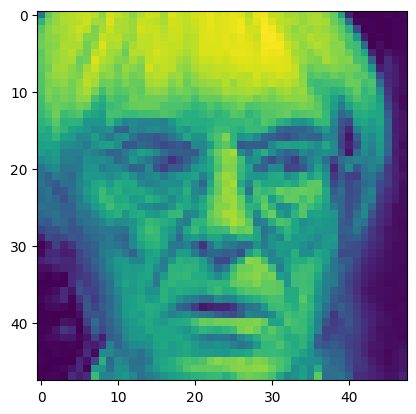

TypeError: Invalid shape (48,) for image data

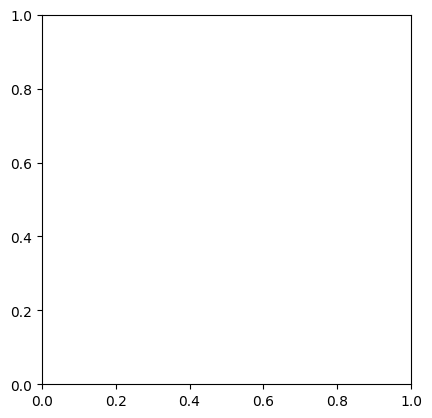

In [25]:
#plot first image based on values from values column in images dataframe
def plot_image(index):
    img = images['values'][index]
    plt.imshow(img)
    plt.show()
    return

plot_image(3)


#plot channel values for first image
def plot_channel(index, channel):
    img = images['values'][index]
    channel_values = [row[channel] for row in img]
    plt.imshow(channel_values, cmap='gray')
    plt.show()
    return

plot_channel(3, 0)

In [15]:
images

,img,width,height,values,set,emotion,emotion_code
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, ...",test,0,angry
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[127, 126, 123, 119, 115, 112, 111, 111, 110,...",test,0,angry
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[250, 251, 251, 249, 250, 250, 248, 251, 250,...",test,0,angry
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[94, 183, 202, 212, 214, 219, 222, 217, 200, ...",test,0,angry
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[73, 78, 86, 101, 113, 117, 123, 129, 127, 11...",test,0,angry
...,...,...,...,...,...,...,...
35882,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[254, 253, 253, 255, 253, 253, 254, 254, 254,...",train,6,surprise
35883,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[42, 33, 50, 30, 25, 40, 71, 109, 140, 149, 1...",train,6,surprise
35884,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[251, 251, 248, 250, 253, 247, 255, 201, 81, ...",train,6,surprise
35885,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,48,"[[253, 253, 255, 252, 254, 253, 249, 192, 153,...",train,6,surprise


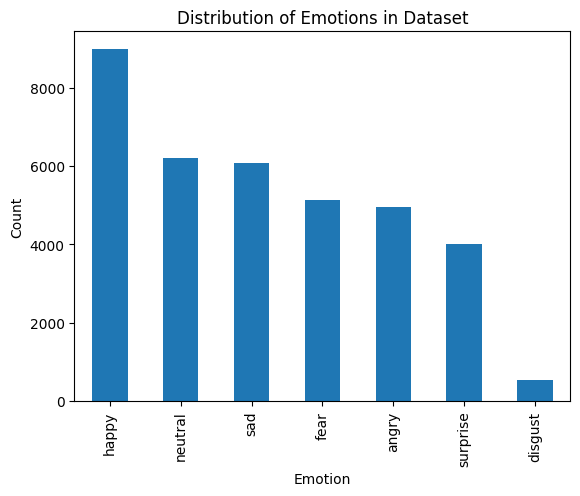

In [21]:
#plot distribution of emotions in dataset but use the emotion codes for x-axis
emotion_count = images['emotion_code'].value_counts()
emotion_count.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Dataset')

plt.show()


